In [1]:
import pandas as pd
import numpy as np
import os
import glob
import random
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
def preprocess_data(data, is_train=True):
    
    temp = data.copy()
    temp = temp[['Hour', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T']]

    if is_train==True:          
    
        temp['Target1'] = temp['TARGET'].shift(-48).fillna(method='ffill')
        temp['Target2'] = temp['TARGET'].shift(-48*2).fillna(method='ffill')
        temp = temp.dropna()
        
        return temp.iloc[:-96]

    elif is_train==False:
        
        temp = temp[['Hour', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T']]
                              
        return temp.iloc[-48:, :]

In [3]:
train = pd.read_csv('./data/train/train.csv')

test = []

for i in range(81):
    file_path = './data/test/' + str(i) + '.csv'
    temp = pd.read_csv(file_path)
    temp = preprocess_data(temp, is_train=False)
    test.append(temp)

df_test = pd.concat(test)

submission = pd.read_csv('./data/sample_submission.csv')

In [4]:
df_train = preprocess_data(train)

df_train.shape, df_test.shape

((52464, 9), (3888, 7))

In [5]:
display(df_train.describe())
display(df_test.describe())

,Hour,TARGET,DHI,DNI,WS,RH,T,Target1,Target2
count,52464.000000,52464.000000,52464.000000,52464.000000,52464.000000,52464.000000,52464.000000,52464.000000,52464.000000
mean,11.500000,17.805046,64.413789,234.772797,2.455596,56.795208,9.297842,17.809249,17.807131
std,6.922253,25.773161,103.963326,349.685953,1.427477,22.065222,10.179041,25.774762,25.773169
min,0.000000,0.000000,0.000000,0.000000,0.000000,7.590000,-19.000000,0.000000,0.000000
25%,5.750000,0.000000,0.000000,0.000000,1.400000,39.667500,1.000000,0.000000,0.000000
50%,11.500000,0.000000,0.000000,0.000000,2.200000,57.600000,9.000000,0.000000,0.000000
75%,17.250000,32.096062,87.000000,469.000000,3.200000,72.780000,17.000000,32.182481,32.180978
max,23.000000,99.913939,528.000000,1059.000000,12.000000,100.000000,35.000000,99.913939,99.913939


,Hour,TARGET,DHI,DNI,WS,RH,T
count,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000
mean,11.500000,18.574770,56.667953,260.021348,2.272814,46.117384,9.525849
std,6.923077,26.649817,88.544167,367.031200,1.235455,20.003953,11.633382
min,0.000000,0.000000,0.000000,0.000000,0.100000,6.750000,-15.700000
25%,5.750000,0.000000,0.000000,0.000000,1.300000,30.027500,-0.200000
50%,11.500000,0.563108,6.000000,0.000000,2.100000,46.700000,8.500000
75%,17.250000,33.026094,79.000000,546.000000,3.000000,60.630000,18.500000
max,23.000000,98.879790,502.000000,1066.000000,7.300000,90.910000,36.700000


In [6]:
min = df_train[['Hour','DHI','DNI','WS','RH','T']].min()
max  = df_train[['Hour','DHI','DNI','WS','RH','T']].max()

In [7]:
for i, col in enumerate(['Hour','DHI','DNI','WS','RH','T']):
    df_train[col] = (df_train[col] - min[i]) / (max[i] - min[i])
    df_test[col] = (df_test[col] - min[i]) / (max[i] - min[i])

In [8]:
display(df_train.describe())
display(df_test.describe())

,Hour,TARGET,DHI,DNI,WS,RH,T,Target1,Target2
count,52464.000000,52464.000000,52464.000000,52464.000000,52464.000000,52464.000000,52464.000000,52464.000000,52464.000000
mean,0.500000,17.805046,0.121996,0.221693,0.204633,0.532466,0.524034,17.809249,17.807131
std,0.300968,25.773161,0.196900,0.330204,0.118956,0.238775,0.188501,25.774762,25.773169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.000000,0.000000,0.116667,0.347122,0.370370,0.000000,0.000000
50%,0.500000,0.000000,0.000000,0.000000,0.183333,0.541175,0.518519,0.000000,0.000000
75%,0.750000,32.096062,0.164773,0.442871,0.266667,0.705443,0.666667,32.182481,32.180978
max,1.000000,99.913939,1.000000,1.000000,1.000000,1.000000,1.000000,99.913939,99.913939


,Hour,TARGET,DHI,DNI,WS,RH,T
count,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000
mean,0.500000,18.574770,0.107326,0.245535,0.189401,0.416918,0.528256
std,0.301003,26.649817,0.167697,0.346583,0.102955,0.216470,0.215433
min,0.000000,0.000000,0.000000,0.000000,0.008333,-0.009090,0.061111
25%,0.250000,0.000000,0.000000,0.000000,0.108333,0.242804,0.348148
50%,0.500000,0.563108,0.011364,0.000000,0.175000,0.423223,0.509259
75%,0.750000,33.026094,0.149621,0.515581,0.250000,0.573964,0.694444
max,1.000000,98.879790,0.950758,1.006610,0.608333,0.901634,1.031481


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_train[['Hour','DHI','DNI','WS','RH','T']] = scaler.fit_transform(df_train[['Hour','DHI','DNI','WS','RH','T']])
df_test[['Hour','DHI','DNI','WS','RH','T']] = scaler.fit_transform(df_test[['Hour','DHI','DNI','WS','RH','T']])

In [9]:
Day  = df_train.iloc[:, :-2]
#Day7 = df_train.iloc[:, -2]
#Day8 = df_train.iloc[:, -1]
Day78 = df_train.iloc[:, -2:]

In [16]:
Day.shape, Day78.shape

((52464, 7), (52464, 2))

In [11]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras.backend import mean, maximum

tf.random.set_seed(42)

In [12]:
def quantile_loss(q, y, pred):
    err = (y-pred)
    return mean(maximum(q*err, (q-1)*err), axis=-1)

In [13]:
q_lst = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [17]:
from sklearn.model_selection import train_test_split

X_train_1, X_valid_1, Y_train_1, Y_valid_1 = train_test_split(Day, Day78, test_size=0.25, random_state=0)
#X_train_2, X_valid_2, Y_train_2, Y_valid_2 = train_test_split(Day, Day8, test_size=0.25, random_state=0)

X_train_1.shape, X_valid_1.shape, Y_train_1.shape, Y_valid_1.shape

((39348, 7), (13116, 7), (39348, 2), (13116, 2))

In [27]:
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(Day.shape)),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(2)
])

In [24]:
epoch = 100

In [25]:
model.compile(loss='mse', optimizer='adam')
hist = model.fit(X_train_1, Y_train_1, epochs=epoch, batch_size=48, validation_split=0.25, 
callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, mode='min', monitor='val_loss', verbose=1)])
model.evaluate(X_valid_1, Y_valid_1)

Epoch 1/100
615/615 [==============================] - 1s 1ms/step - loss: 415.2257 - val_loss: 187.0625
Epoch 2/100
615/615 [==============================] - 1s 1ms/step - loss: 171.1208 - val_loss: 162.8335
Epoch 3/100
615/615 [==============================] - 1s 1ms/step - loss: 158.4086 - val_loss: 161.0661
Epoch 4/100
615/615 [==============================] - 1s 1ms/step - loss: 153.5174 - val_loss: 160.4859
Epoch 5/100
615/615 [==============================] - 1s 1ms/step - loss: 152.6728 - val_loss: 155.9737
Epoch 6/100
615/615 [==============================] - 1s 1ms/step - loss: 148.8375 - val_loss: 158.8685
Epoch 7/100
615/615 [==============================] - 1s 1ms/step - loss: 148.8867 - val_loss: 157.0578
Epoch 8/100
615/615 [==============================] - 1s 1ms/step - loss: 147.0485 - val_loss: 150.9510
Epoch 9/100
615/615 [==============================] - 1s 1ms/step - loss: 145.1430 - val_loss: 151.9024
Epoch 10/100
615/615 [==============================] -

136.61508178710938

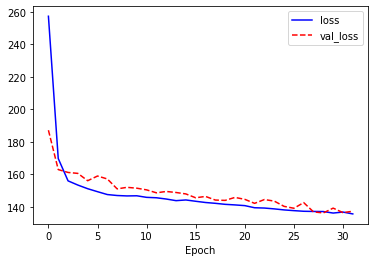

In [26]:
plt.plot(hist.history['loss'], 'b-', label='loss')
plt.plot(hist.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [28]:
results = pd.DataFrame()

for q in q_lst:
    model.compile(loss=lambda y,pred: quantile_loss(q,y,pred), optimizer='adam')
    model.fit(Day, Day78, epochs=epoch, batch_size=48, validation_split=0.25, 
callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, mode='min', monitor='val_loss', verbose=1)])
    pred = pd.DataFrame(model.predict(df_test))
    results = pd.concat([results, pred], axis=1)

results.shape

Epoch 1/100
820/820 [==============================] - 1s 1ms/step - loss: 1.4698 - val_loss: 1.6210
Epoch 2/100
820/820 [==============================] - 1s 1ms/step - loss: 1.4320 - val_loss: 1.6207
Epoch 3/100
820/820 [==============================] - 1s 1ms/step - loss: 1.4219 - val_loss: 1.6194
Epoch 4/100
820/820 [==============================] - 1s 1ms/step - loss: 1.4197 - val_loss: 1.6187
Epoch 5/100
820/820 [==============================] - 1s 1ms/step - loss: 1.4322 - val_loss: 1.6212
Epoch 6/100
820/820 [==============================] - 1s 1ms/step - loss: 1.4240 - val_loss: 1.6301
Epoch 7/100
820/820 [==============================] - 1s 1ms/step - loss: 1.4294 - val_loss: 1.6368
Epoch 00007: early stopping
Epoch 1/100
820/820 [==============================] - 1s 1ms/step - loss: 2.3393 - val_loss: 2.6724
Epoch 2/100
820/820 [==============================] - 1s 1ms/step - loss: 2.3169 - val_loss: 2.6667
Epoch 3/100
820/820 [==============================] - 1s 1ms/s

820/820 [==============================] - 2s 1ms/step - loss: 2.8063 - val_loss: 3.1118
Epoch 2/100
820/820 [==============================] - 1s 1ms/step - loss: 2.7692 - val_loss: 3.1383
Epoch 3/100
820/820 [==============================] - 1s 1ms/step - loss: 2.7746 - val_loss: 3.1758
Epoch 4/100
820/820 [==============================] - 1s 1ms/step - loss: 2.7656 - val_loss: 3.1528
Epoch 00004: early stopping
Epoch 1/100
820/820 [==============================] - 2s 2ms/step - loss: 2.6664 - val_loss: 2.9857
Epoch 2/100
820/820 [==============================] - 1s 1ms/step - loss: 2.6424 - val_loss: 3.0234
Epoch 3/100
820/820 [==============================] - 1s 1ms/step - loss: 2.6440 - val_loss: 3.0292
Epoch 4/100
820/820 [==============================] - 1s 2ms/step - loss: 2.6387 - val_loss: 3.0704
Epoch 00004: early stopping
Epoch 1/100
820/820 [==============================] - 2s 1ms/step - loss: 2.3610 - val_loss: 2.6649
Epoch 2/100
820/820 [==========================

820/820 [==============================] - 1s 1ms/step - loss: 1.4046 - val_loss: 1.5895
Epoch 6/100
820/820 [==============================] - 1s 1ms/step - loss: 1.3961 - val_loss: 1.5875
Epoch 00006: early stopping
Epoch 1/100
820/820 [==============================] - 1s 1ms/step - loss: 0.7908 - val_loss: 0.8919
Epoch 2/100
820/820 [==============================] - 1s 1ms/step - loss: 0.7816 - val_loss: 0.9137
Epoch 3/100
820/820 [==============================] - 1s 1ms/step - loss: 0.7864 - val_loss: 0.8953
Epoch 4/100
820/820 [==============================] - 1s 1ms/step - loss: 0.7832 - val_loss: 0.8716
Epoch 5/100
820/820 [==============================] - 1s 1ms/step - loss: 0.7809 - val_loss: 0.8854
Epoch 6/100
820/820 [==============================] - 1s 1ms/step - loss: 0.7831 - val_loss: 0.8713
Epoch 7/100
820/820 [==============================] - 1s 1ms/step - loss: 0.7897 - val_loss: 0.9185
Epoch 8/100
820/820 [==============================] - 1s 1ms/step - loss: 

(3888, 18)

In [30]:
results[0]

,0,0,0,0,0,0,0,0,0
0,-0.004153,0.002843,-0.001207,-0.001862,0.000021,-0.022758,-0.012966,0.011103,0.019494
1,-0.004189,0.002813,-0.001314,-0.001998,-0.000110,-0.022800,-0.013007,0.011176,0.019334
2,-0.004140,0.003487,-0.003536,-0.002044,0.000697,-0.020959,-0.011973,0.012025,0.019136
3,-0.004144,0.003534,-0.003438,-0.002039,0.000708,-0.020988,-0.011924,0.012060,0.019261
4,-0.004015,0.002356,-0.003456,-0.001753,0.002338,-0.018619,-0.009752,0.011185,0.020084
...,...,...,...,...,...,...,...,...,...
3883,-0.003374,0.000683,-0.002908,-0.002415,-0.000894,-0.007056,-0.002409,0.006319,0.018223
3884,-0.003345,0.000684,-0.002781,-0.002001,-0.000696,-0.007201,-0.002197,0.006689,0.018078
3885,-0.003351,0.000713,-0.002724,-0.001968,-0.000704,-0.007167,-0.002120,0.006743,0.018092
3886,-0.003373,0.000721,-0.002590,-0.001172,0.000635,-0.007362,-0.001846,0.007099,0.018186


In [31]:
submission.loc[submission.id.str.contains("Day7"), "q_0.1":] = results[0].sort_index().values
submission.loc[submission.id.str.contains("Day8"), "q_0.1":] = results[1].sort_index().values
submission

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
0,0.csv_Day7_0h00m,-0.004153,0.002843,-0.001207,-0.001862,0.000021,-0.022758,-0.012966,0.011103,0.019494
1,0.csv_Day7_0h30m,-0.004189,0.002813,-0.001314,-0.001998,-0.000110,-0.022800,-0.013007,0.011176,0.019334
2,0.csv_Day7_1h00m,-0.004140,0.003487,-0.003536,-0.002044,0.000697,-0.020959,-0.011973,0.012025,0.019136
3,0.csv_Day7_1h30m,-0.004144,0.003534,-0.003438,-0.002039,0.000708,-0.020988,-0.011924,0.012060,0.019261
4,0.csv_Day7_2h00m,-0.004015,0.002356,-0.003456,-0.001753,0.002338,-0.018619,-0.009752,0.011185,0.020084
...,...,...,...,...,...,...,...,...,...,...
7771,80.csv_Day8_21h30m,-0.001364,-0.003217,-0.004906,-0.007510,-0.003738,-0.006655,-0.000176,0.010089,0.013522
7772,80.csv_Day8_22h00m,-0.001155,-0.003781,-0.006050,-0.007872,-0.004924,-0.007768,-0.000165,0.010279,0.013614
7773,80.csv_Day8_22h30m,-0.001119,-0.003762,-0.005920,-0.007883,-0.004942,-0.007721,-0.000017,0.010304,0.013605
7774,80.csv_Day8_23h00m,-0.001063,-0.004308,-0.007040,-0.007187,-0.002812,-0.009530,0.000222,0.010486,0.013600


In [32]:
submission.to_csv('./submission/submission_20210117-2.csv', index=False)